In [1]:
# Import packages
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import statsmodels.api as sm
os.listdir()

['.ipynb_checkpoints',
 'Binance_Bot_2021-01-15-Copy1.ipynb',
 'Binance_Bot_2021-01-15.ipynb',
 'Binance_Bot_Example.ipynb',
 'Binance_Trading.ipynb',
 'bot_troubleshooting.ipynb',
 'buy_counts.txt',
 'Capstone.ipynb',
 'Capstone_2.ipynb',
 'Capstone_2_DataWrangling.ipynb',
 'Capstone_2_EDA.ipynb',
 'Capstone_2_Final.ipynb',
 'Capstone_2_RFE.ipynb',
 'Capstone_2_test.ipynb',
 'Capstone_2_v3.ipynb',
 'Capstone_2_v4.ipynb',
 'Cluster_Analysis.ipynb',
 'codebook_publicv4.xlsx',
 'Coinbase_Candlestick.ipynb',
 'config.py',
 'Data Cleaning',
 'Data Cleaning.zip',
 'Data_Wrangling.ipynb',
 'grid_data.ipynb',
 'MonteCarlo_Option.ipynb',
 'Pandas_Profiling.ipynb',
 'Pandas_Profiling_Results.html',
 'recs2015.csv',
 'recs2015_copy.xlsx',
 'removed_list.xlsx',
 'removed_list2.xlsx',
 'removed_list_inspection.xlsx',
 'Resources',
 'results.xlsx',
 'results_sorted.xlsx',
 'sell_counts.txt',
 'Untitled.ipynb',
 'WaterAPI.ipynb',
 'Yunjeong_Mo_vars.xlsx',
 '__pycache__']

In [2]:
# Data Collection
# Data files and codebook from: https://www.eia.gov/consumption/residential/data/2015/index.php?view=microdata

# Load and Preview DataFrame
df = pd.read_csv('recs2015.csv')
df = df.set_index(['DOEID'])
print(df.shape)
df.head()

(5686, 758)


,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
DOEID,,,,,,,,,,,,,,,,,,,,,
10001,4,10,METRO,U,2,0,0,0,-2,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
10002,3,7,NONE,R,2,0,0,0,-2,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
10003,3,6,METRO,U,2,0,1,0,1,0,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
10004,2,4,MICRO,C,2,0,1,0,1,0,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
10005,1,2,METRO,U,2,0,1,0,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2


In [3]:
# Create feature for electric rate; total electric
df['ELRATE'] = df['DOLLAREL']/df['KWH']

### Exploratory Data Analysis

<AxesSubplot:xlabel='BEDROOMS', ylabel='KWH'>

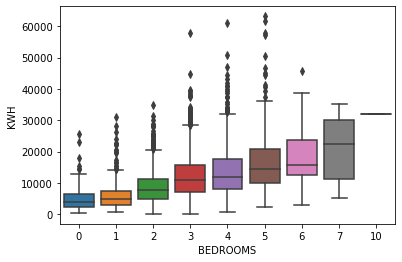

In [4]:
sns.boxplot(x=df['BEDROOMS'],y=df['KWH'])

<AxesSubplot:xlabel='YEARMADERANGE', ylabel='KWH'>

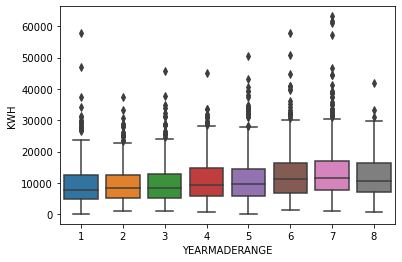

In [5]:
sns.boxplot(x=df['YEARMADERANGE'],y=df['KWH'])

<AxesSubplot:xlabel='REGIONC', ylabel='KWH'>

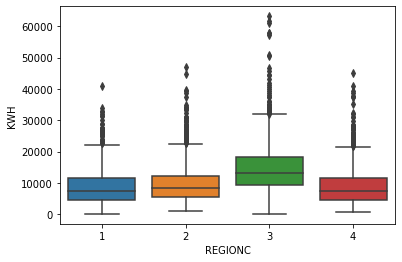

In [6]:
sns.boxplot(x=df['REGIONC'],y=df['KWH'])

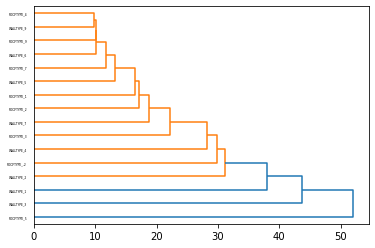

<Figure size 2160x2160 with 0 Axes>

,WALLTYPE_1,WALLTYPE_2,WALLTYPE_3,WALLTYPE_4,WALLTYPE_5,WALLTYPE_6,WALLTYPE_7,WALLTYPE_9,ROOFTYPE_-2,ROOFTYPE_1,ROOFTYPE_2,ROOFTYPE_3,ROOFTYPE_4,ROOFTYPE_5,ROOFTYPE_7,ROOFTYPE_9
DOEID,,,,,,,,,,,,,,,,
10001,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
10002,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
10003,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10004,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10005,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
# Perform hierarchial clustering on building properties
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

X0 = pd.get_dummies(df[['WALLTYPE', 'ROOFTYPE']].astype(str))

mergings = linkage(X0.T, method='single')
dendrogram(mergings, labels=X0.columns, leaf_rotation=0, leaf_font_size=3, orientation='right')
plt.figure(figsize=(30,30))
plt.show()
plt.rcParams['figure.dpi'] = 150
X0.head()

### Data Cleaning

#### -->Eliminate Extraneous Features

In [8]:
# Read in lists of non-predictive features
impute0 = pd.read_excel('Data Cleaning/imputation_flags.xlsx')['Variable']
conversion0 = pd.read_excel('Data Cleaning/conversion_factors.xlsx')['Variable']
other_utilities0 = pd.read_excel('Data Cleaning/other_utilities.xlsx')['Variable']
estimators0 = pd.read_excel('Data Cleaning/statistical_estimators.xlsx')['Variable']
utility_costs0 = pd.read_excel('Data Cleaning/utility_costs.xlsx')['Variable']
miscellaneous0 = pd.read_excel('Data Cleaning/miscellaneous_not_used.xlsx')['Variable']
redundant0 = pd.read_excel('Data Cleaning/redundant_vars.xlsx')['Variable']
detailed0 = pd.read_excel('Data Cleaning/detailed_audit.xlsx')['Variable']

In [9]:
# Read in lists of similar predictive features that may work better as clusters or principal components
tenant_behavior_c = pd.read_excel('Data Cleaning/tenant_behavior_cluster.xlsx')['Variable']
energy_star_c = pd.read_excel('Data Cleaning/energy_star_cluster.xlsx')['Variable']
energy_assistance_c = pd.read_excel('Data Cleaning/energy_assistance_cluster.xlsx')['Variable']

In [10]:
# Combine nonpredictive features into a single list
nonpredict = np.concatenate((impute0, conversion0, other_utilities0, estimators0, utility_costs0, miscellaneous0, redundant0, detailed0), axis=0)

In [11]:
# Combine clusters into list to be temporarily dropped
clustervars = np.concatenate((tenant_behavior_c, energy_star_c, energy_assistance_c), axis=0)

In [12]:
# Drop nonpredictive features
df = df.drop(nonpredict, axis=1)
df = df.drop(clustervars, axis=1)

#### -->Inspect Resulting Dataframe

In [13]:
# Count missing values: {'Not applicable': -2, 'Don't Know': -9, 'Refuse': -8}

# Create mask for each type of missing value
na_mask = df.apply(lambda x: x==-2)
dk_mask = df.apply(lambda x: x==-9)
refuse_mask = df.apply(lambda x: x==-8)

In [14]:
# Count number of instances where mask is True, then filter out columns with no missing values
na = df[na_mask].count()[df[na_mask].count() > 0]
dk = df[dk_mask].count()[df[dk_mask].count() > 0]
refuse = df[refuse_mask].count()[df[refuse_mask].count() > 0]

print(str(len(na.index)) + ' columns containing \"Not applicable\" values.')
print(str(len(dk.index)) + ' columns containing \"Dont know\" values.')
print(str(len(refuse.index)) + ' columns containing \"Refuse\" values.')

48 columns containing "Not applicable" values.
4 columns containing "Dont know" values.
2 columns containing "Refuse" values.


#### -->Replace Negative Variables

In [15]:
# Replace negative values for binary variables (i.e. where negatives are "not applicable")
# Read in binary variables
binaryvars = pd.read_excel('Data Cleaning/binary_vars.xlsx')['Variable']

# Filter out negative values ("Not applicable" means approximately the same as "no" or "does not have")
df[binaryvars] = df[binaryvars].apply(lambda x: (x>0)*x)

#### -->Make Categorical Variables Dummy Variables

In [16]:
# Create dummy variables for columns with missing answers, making the missing values the base case.

# Read in list of categorical variables
cat_vars = pd.read_excel('Data Cleaning/categorical_vars.xlsx')['Variable']

In [ ]:
df = pd.get_dummies(df.astype(str), columns=cat_vars, drop_first=True, prefix=cat_vars).astype('float64')

In [ ]:
# Check missing values
print(df.isna().sum().max())

# Inspect DataFrame
df.shape

### Feature Selection

In [ ]:
# Feature Selection

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
# Split Data
X = df.drop('KWH', axis=1)
names = df.drop('KWH', axis=1).columns
y = df['KWH']

#### -->Lasso Regression

In [ ]:
# Lasso: Select Features

lasso = Lasso(alpha=2, max_iter=1000, normalize=True)
lasso_coef = lasso.fit(X,y).coef_
coef = pd.DataFrame(lasso_coef, names)
coef_names = coef[coef[0]>0].index
print(coef_names)
len(coef_names)

In [ ]:
# Lasso: Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 41)
model = lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

In [ ]:
# Perform cross validation
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(lasso, X, y, cv=5)
lasso_eval = np.mean(cv_results)
print(lasso_eval)

In [ ]:
#Correlation
np.corrcoef(y_pred, y_test)

**Reuse features from Lasso regression feature selection for other models**

In [ ]:
# Create new filtered dataframe for X

X = df[coef_names]

### Linear Regression

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 41)
linear = LinearRegression()
model = linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
linear.score(X_test, y_test)

In [ ]:
# Perform cross validation

cv_results = cross_val_score(linear, X, y, cv=5)
linear_eval = np.mean(cv_results)
print(linear_eval)

In [ ]:
#Correlation
np.corrcoef(y_pred, y_test)

In [ ]:
# Inspect coefficients
col = pd.DataFrame(X_test.columns)
coefs = pd.DataFrame(model.coef_).transpose()
pd.merge(col,coefs,left_index=True, right_index=True, indicator=True).sort_values(by='0_y', ascending=False).head(20)

In [ ]:
# View coefficients for interpretability

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.pvalues)
est2.summary()

In [ ]:
# Create DataFrame comparing LinearRegression Predicted kWh to Actual kWh

predicted = pd.DataFrame(y_pred, columns=['Predicted']).set_index(y_test.index)
results = pd.merge(predicted, y_test, left_index=True, right_index = True)
results_sorted = results.sort_values(['KWH'])

In [ ]:
# Visually inspect results

_ = plt.scatter(np.arange(len(X_test)), results_sorted['Predicted'])
_ = plt.scatter(np.arange(len(X_test)), results_sorted['KWH'])
plt.legend(['Predicted kWh','Actual kWh'])
plt.title("Linear Regression: Predicted and Actual kWh")
plt.show()

### Ridge Regression

In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
model = ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

In [ ]:
# Perform cross validation

cv_results = cross_val_score(ridge, X, y, cv=5)
ridge_eval =  np.mean(cv_results)
print(ridge_eval)

In [ ]:
np.corrcoef(y_pred, y_test)

In [ ]:
# Inspect coefficients
col = pd.DataFrame(X_test.columns)
coefs = pd.DataFrame(model.coef_).transpose()
pd.merge(col,coefs,left_index=True, right_index=True).sort_values('0_y', ascending=False)[:50]

In [ ]:
# Create DataFrame comparing RidgeRegression Predicted kWh to Actual kWh

predicted = pd.DataFrame(y_pred, columns=['Predicted']).set_index(y_test.index)
results = pd.merge(predicted, y_test, left_index=True, right_index = True)
results_sorted = results.sort_values(['KWH'])

In [ ]:
# Visually inspect results
_ = plt.scatter(np.arange(len(X_test)), results_sorted['Predicted'])
_ = plt.scatter(np.arange(len(X_test)), results_sorted['KWH'])
plt.legend(['Predicted kWh','Actual kWh'])
plt.title("Ridge Regression: Predicted and Actual kWh")
plt.show()

In [ ]:
print('Cross Validation Results')
print('Lasso_Regression:', lasso_eval)
print('Linear_Regression:', linear_eval)
print('Ridge_Regression:', ridge_eval)

Summary

I used Lasso Regression for feature selection. A higher alpha in the Lasso regression reduces the number of features, while a lower alpha preserves features. I manually tested the results of different alphas and determined that alpha=2 preserves most of the accuracy while substantially reducing number of features (down to 48 from the original 228 post manual feature inspection and deletion).

I then performed model fitting and 5-fold cross-validation for a lasso, linear, and ridge regression model. All produced similar cross-validation scores (shown above) and had correlation coefficients of 0.77 to 0.78 between predicted kWh and test-set kWh.

The linear regression model may be the best choice for its interpretability, even though lasso and ridge regression produced very slight improvements in cross-validation scores.